1. Implement a K-Nearest Neighbors (KNN) Algorithm

In [1]:
from typing import List, Tuple
import math
from collections import Counter

def euclidean_distance(point1: Tuple[float, float], point2: Tuple[float, float]) -> float:
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def knn_classifier(data_points: List[Tuple[float, float, str]],
                   new_point: Tuple[float, float],
                   k: int = 3) -> str:
    # Calculate distances from the new point to all data points
    distances = []
    for (x, y, label) in data_points:
        distance = euclidean_distance(new_point, (x, y))
        distances.append((distance, label))

    # Sort distances and get the k nearest labels
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]

    # Vote for the most common label among the k nearest
    most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]

    return most_common_label

data_points = [
    (1.0, 2.0, 'A'),
    (2.0, 3.0, 'A'),
    (3.0, 3.0, 'B'),
    (6.0, 5.0, 'B'),
    (7.0, 8.0, 'C')
]
new_point = (5.0, 5.0)
predicted_label = knn_classifier(data_points, new_point)
print(predicted_label)  # Output will be the predicted label for the new point

B


2. Remove Outliers from Data

In [2]:
from typing import List
import numpy as np

def remove_outliers(data: List[float]) -> List[float]:
    if not data:  # Return an empty list if the input is empty
        return []

    # Calculate the mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)

    # Define the thresholds for outliers
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Filter the data to remove outliers
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    return filtered_data

data = [10, 12, 12, 13, 12, 100, 14, 11, 13, 12]
cleaned_data = remove_outliers(data)
print(cleaned_data)  # This will output the list without outliers

[10, 12, 12, 13, 12, 14, 11, 13, 12]


3. Optimize a Matrix Multiplication for Neural Network

In [3]:
from typing import List

def matrix_multiply(mat1: List[List[int]], mat2: List[List[int]]) -> List[List[int]]:
    # Check if the matrices can be multiplied
    if not mat1 or not mat2 or len(mat1[0]) != len(mat2):
        raise ValueError("Incompatible matrices for multiplication.")

    # Dimensions of the resulting matrix
    rows_mat1 = len(mat1)
    cols_mat1 = len(mat1[0])
    cols_mat2 = len(mat2[0])

    # Initialize the result matrix with zeros
    result = [[0] * cols_mat2 for _ in range(rows_mat1)]

    # Perform matrix multiplication
    for i in range(rows_mat1):
        for j in range(cols_mat2):
            for k in range(cols_mat1):  # or len(mat2), as len(mat1[0]) == len(mat2)
                result[i][j] += mat1[i][k] * mat2[k][j]

    return result

mat1 = [
    [1, 2, 3],
    [4, 5, 6]
]

mat2 = [
    [7, 8],
    [9, 10],
    [11, 12]
]

result = matrix_multiply(mat1, mat2)
print(result)  # Output: [[58, 64], [139, 154]]

[[58, 64], [139, 154]]


4. Word Embedding Similarity

In [4]:
from typing import List
import math

def cosine_similarity(vec1: List[float], vec2: List[float]) -> float:
    # Check if the vectors are of the same length
    if len(vec1) != len(vec2) or len(vec1) == 0:
        raise ValueError("Vectors must be of the same length and non-empty.")

    # Calculate the dot product
    dot_product = sum(a * b for a, b in zip(vec1, vec2))

    # Calculate the magnitudes
    magnitude_vec1 = math.sqrt(sum(a ** 2 for a in vec1))
    magnitude_vec2 = math.sqrt(sum(b ** 2 for b in vec2))

    # Check for zero magnitude to avoid division by zero
    if magnitude_vec1 == 0 or magnitude_vec2 == 0:
        return 0.0  # or raise an error, depending on how you want to handle it

    # Calculate and return cosine similarity
    return dot_product / (magnitude_vec1 * magnitude_vec2)

vec1 = [1.0, 2.0, 3.0]
vec2 = [4.0, 5.0, 6.0]

similarity = cosine_similarity(vec1, vec2)
print(similarity)  # Output: cosine similarity value

0.9746318461970762


5. Implement a Min-Heap Using a Priority Queue

In [5]:
import heapq

class MinHeap:
    def __init__(self):
        # Initialize an empty list to store the heap elements
        self.heap = []

    def insert(self, value: int) -> None:
        # Use heapq to push the new value onto the heap
        heapq.heappush(self.heap, value)

    def get_min(self) -> int:
        # Return the smallest element without removing it
        if not self.heap:
            raise IndexError("get_min from an empty heap.")
        return self.heap[0]

    def extract_min(self) -> int:
        # Pop and return the smallest element from the heap
        if not self.heap:
            raise IndexError("extract_min from an empty heap.")
        return heapq.heappop(self.heap)

# Example usage
if __name__ == "__main__":
    min_heap = MinHeap()
    min_heap.insert(5)
    min_heap.insert(3)
    min_heap.insert(8)

    print("Minimum value:", min_heap.get_min())  # Output: 3
    print("Extracted minimum:", min_heap.extract_min())  # Output: 3
    print("New minimum value:", min_heap.get_min())  # Output: 5\

Minimum value: 3
Extracted minimum: 3
New minimum value: 5


6. Implement a Support Vector Machine (SVM) Classifier

In [6]:
from typing import List, Tuple
import numpy as np

def svm_classifier(data_points: List[Tuple[float, float, str]],
                   new_point: Tuple[float, float]) -> str:
    # Prepare the data
    X = np.array([[x, y] for x, y, _ in data_points])
    y = np.array([1 if label == 'A' else -1 for _, _, label in data_points])

    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0.0
    learning_rate = 0.01
    epochs = 1000

    # Training the SVM using a simple version of the Perceptron
    for _ in range(epochs):
        for idx, x_i in enumerate(X):
            # Calculate the decision function
            if y[idx] * (np.dot(x_i, weights) + bias) >= 1:
                # Correctly classified
                weights -= learning_rate * (2 * 0.01 * weights)  # Regularization term
            else:
                # Incorrectly classified
                weights += learning_rate * (y[idx] * x_i)
                bias += learning_rate * y[idx]

    # Prediction for the new point
    new_point_array = np.array(new_point)
    decision_value = np.dot(new_point_array, weights) + bias

    return 'A' if decision_value >= 0 else 'B'

# Example usage
data_points = [
    (1.0, 2.0, 'A'),
    (2.0, 3.0, 'A'),
    (3.0, 1.0, 'B'),
    (5.0, 2.0, 'B'),
]
new_point = (4.0, 2.5)

predicted_label = svm_classifier(data_points, new_point)
print(predicted_label)  # Output: Predicted label for the new point

B


7. Calculate the Z-Score of Data

In [7]:
from typing import List
import math

def calculate_z_scores(data: List[float]) -> List[float]:
    if len(data) == 0:
        raise ValueError("Data list cannot be empty.")

    # Calculate the mean
    mean = sum(data) / len(data)

    # Calculate the standard deviation
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std_dev = math.sqrt(variance)

    # Calculate z-scores
    z_scores = [(x - mean) / std_dev for x in data]

    return z_scores

# Example usage
data = [10, 20, 30, 40, 50]
z_scores = calculate_z_scores(data)
print(z_scores)  # Output: Z-scores for the given data

[-1.414213562373095, -0.7071067811865475, 0.0, 0.7071067811865475, 1.414213562373095]


8. K-Means Clustering Implementation

In [1]:
from typing import List, Tuple
import random
import numpy as np

def calculate_distance(point1: Tuple[float, float], point2: Tuple[float, float]) -> float:
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def k_means_clustering(data_points: List[Tuple[float, float]], k: int) -> List[Tuple[float, float]]:
    # Randomly initialize the centroids
    centroids = random.sample(data_points, k)
    prev_centroids = None

    while centroids != prev_centroids:
        # Assign clusters
        clusters = [[] for _ in range(k)]

        for point in data_points:
            # Find the nearest centroid
            distances = [calculate_distance(point, centroid) for centroid in centroids]
            nearest_centroid_idx = distances.index(min(distances))
            clusters[nearest_centroid_idx].append(point)

        # Update centroids
        prev_centroids = centroids.copy()
        centroids = []

        for cluster in clusters:
            if cluster:  # Avoid division by zero
                centroid = (np.mean([p[0] for p in cluster]), np.mean([p[1] for p in cluster]))
                centroids.append(centroid)
            else:
                # If a cluster is empty, reinitialize its centroid randomly
                centroids.append(random.choice(data_points))

    return centroids

# Example usage
data_points = [
    (1.0, 2.0),
    (1.5, 1.8),
    (5.0, 8.0),
    (8.0, 8.0),
    (1.0, 0.6),
    (9.0, 11.0)
]
k = 2

centroids = k_means_clustering(data_points, k)
print("Centroids:", centroids)  # Output: Final centroids after clustering

Centroids: [(7.333333333333333, 9.0), (1.1666666666666667, 1.4666666666666666)]


9. Evaluate Classification Model Using F1 Score

In [2]:
from typing import List

def f1_score(true_labels: List[int], predicted_labels: List[int]) -> float:
    if len(true_labels) == 0 or len(true_labels) != len(predicted_labels):
        raise ValueError("Input lists must be of the same non-zero length.")

    # Initialize counts
    TP = FP = FN = 0

    # Calculate TP, FP, and FN
    for true, pred in zip(true_labels, predicted_labels):
        if true == 1 and pred == 1:
            TP += 1  # True Positive
        elif true == 0 and pred == 1:
            FP += 1  # False Positive
        elif true == 1 and pred == 0:
            FN += 1  # False Negative

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0

    # Calculate F1 Score
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0.0  # F1 Score is zero if both precision and recall are zero

    return f1

# Example usage
true_labels = [1, 0, 1, 1, 0, 1, 0]
predicted_labels = [1, 0, 1, 0, 0, 1, 1]

f1 = f1_score(true_labels, predicted_labels)
print("F1 Score:", f1)  # Output: F1 Score

F1 Score: 0.75


10. Visualize Data Distribution Using a Histogram

In [3]:
from typing import List, Dict

def create_histogram(data: List[float], bins: int) -> Dict[str, int]:
    if bins <= 0:
        raise ValueError("Number of bins must be a positive integer.")
    if not data:
        return {}

    min_data = min(data)
    max_data = max(data)

    # Calculate the bin width
    bin_width = (max_data - min_data) / bins

    # Initialize the histogram dictionary
    histogram = {f"{min_data + i * bin_width:.2f} - {min_data + (i + 1) * bin_width:.2f}": 0 for i in range(bins)}

    # Count the data points in each bin
    for value in data:
        # Determine which bin the value falls into
        bin_index = int((value - min_data) / bin_width)
        if bin_index == bins:  # Edge case for the maximum value
            bin_index -= 1
        # Update the count in the appropriate bin
        bin_key = f"{min_data + bin_index * bin_width:.2f} - {min_data + (bin_index + 1) * bin_width:.2f}"
        histogram[bin_key] += 1

    return histogram

# Example usage
data = [1.2, 2.4, 2.2, 3.5, 4.0, 5.5, 6.7, 7.8, 2.3, 4.6]
bins = 5

histogram = create_histogram(data, bins)
print("Histogram:", histogram)

Histogram: {'1.20 - 2.52': 4, '2.52 - 3.84': 1, '3.84 - 5.16': 2, '5.16 - 6.48': 1, '6.48 - 7.80': 2}


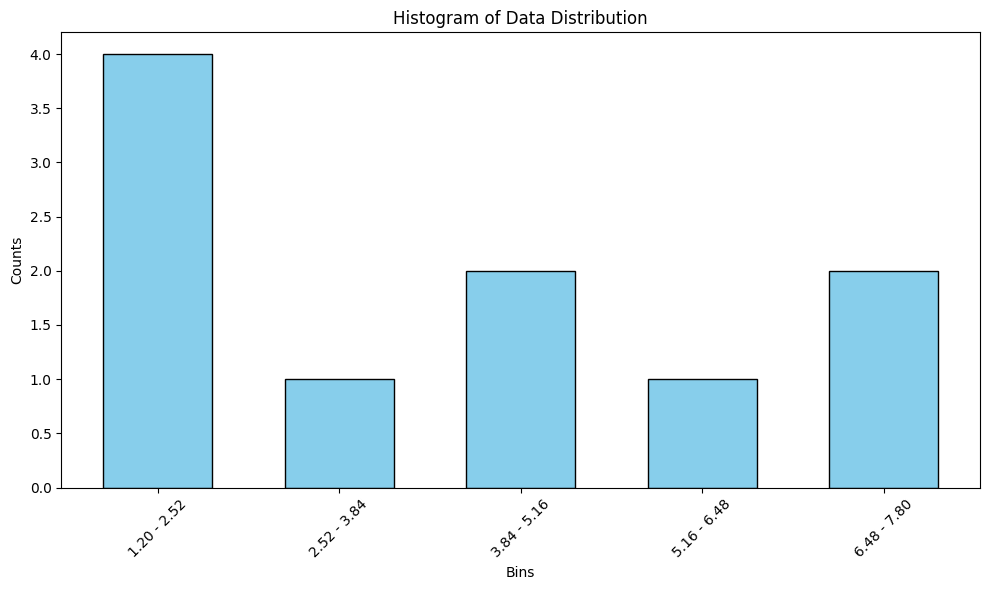

In [4]:
from typing import List, Dict
import matplotlib.pyplot as plt

def create_histogram(data: List[float], bins: int) -> Dict[str, int]:
    if bins <= 0:
        raise ValueError("Number of bins must be a positive integer.")
    if not data:
        return {}

    min_data = min(data)
    max_data = max(data)

    # Calculate the bin width
    bin_width = (max_data - min_data) / bins

    # Initialize the histogram dictionary
    histogram = {f"{min_data + i * bin_width:.2f} - {min_data + (i + 1) * bin_width:.2f}": 0 for i in range(bins)}

    # Count the data points in each bin
    for value in data:
        # Determine which bin the value falls into
        bin_index = int((value - min_data) / bin_width)
        if bin_index == bins:  # Edge case for the maximum value
            bin_index -= 1
        # Update the count in the appropriate bin
        bin_key = f"{min_data + bin_index * bin_width:.2f} - {min_data + (bin_index + 1) * bin_width:.2f}"
        histogram[bin_key] += 1

    return histogram

def plot_histogram(data: List[float], bins: int) -> None:
    histogram = create_histogram(data, bins)

    # Prepare data for plotting
    bin_labels = list(histogram.keys())
    counts = list(histogram.values())

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(bin_labels, counts, width=0.6, color='skyblue', edgecolor='black')
    plt.xlabel('Bins')
    plt.ylabel('Counts')
    plt.title('Histogram of Data Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()

# Example usage
data = [1.2, 2.4, 2.2, 3.5, 4.0, 5.5, 6.7, 7.8, 2.3, 4.6]
bins = 5

plot_histogram(data, bins)

11. Implement a Decision Tree Classifier

In [5]:
from typing import List, Tuple, Any, Dict
import numpy as np

class DecisionNode:
    def __init__(self, feature_index: int = None, threshold: float = None, left: Any = None, right: Any = None, value: str = None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def gini_impurity(y: List[str]) -> float:
    classes, counts = np.unique(y, return_counts=True)
    impurity = 1 - sum((count / len(y)) ** 2 for count in counts)
    return impurity

def best_split(X: List[List[float]], y: List[str]) -> Tuple[int, float]:
    best_gain = 0
    best_index, best_threshold = None, None
    n_features = len(X[0])

    for feature_index in range(n_features):
        thresholds = set([x[feature_index] for x in X])

        for threshold in thresholds:
            left_indices = [i for i in range(len(X)) if X[i][feature_index] <= threshold]
            right_indices = [i for i in range(len(X)) if X[i][feature_index] > threshold]

            if not left_indices or not right_indices:
                continue

            left_y = [y[i] for i in left_indices]
            right_y = [y[i] for i in right_indices]

            gain = gini_impurity(y) - (len(left_y) / len(y) * gini_impurity(left_y) + len(right_y) / len(y) * gini_impurity(right_y))

            if gain > best_gain:
                best_gain = gain
                best_index = feature_index
                best_threshold = threshold

    return best_index, best_threshold

def build_tree(X: List[List[float]], y: List[str], depth: int = 0, max_depth: int = None) -> DecisionNode:
    if len(set(y)) == 1 or (max_depth is not None and depth >= max_depth):
        return DecisionNode(value=y[0])

    feature_index, threshold = best_split(X, y)
    if feature_index is None:
        return DecisionNode(value=max(set(y), key=y.count))

    left_indices = [i for i in range(len(X)) if X[i][feature_index] <= threshold]
    right_indices = [i for i in range(len(X)) if X[i][feature_index] > threshold]

    left_node = build_tree([X[i] for i in left_indices], [y[i] for i in left_indices], depth + 1, max_depth)
    right_node = build_tree([X[i] for i in right_indices], [y[i] for i in right_indices], depth + 1, max_depth)

    return DecisionNode(feature_index, threshold, left_node, right_node)

def predict(node: DecisionNode, x: List[float]) -> str:
    if node.value is not None:
        return node.value
    if x[node.feature_index] <= node.threshold:
        return predict(node.left, x)
    else:
        return predict(node.right, x)

def decision_tree_classifier(data_points: List[Tuple[List[float], str]], new_point: List[float]) -> str:
    X = [point[0] for point in data_points]
    y = [point[1] for point in data_points]

    tree = build_tree(X, y)
    return predict(tree, new_point)

# Example usage
data_points = [
    ([2.0, 3.0], 'A'),
    ([1.0, 1.0], 'A'),
    ([4.0, 5.0], 'B'),
    ([5.0, 4.0], 'B'),
    ([3.0, 2.0], 'A'),
]

new_point = [4.5, 4.5]

predicted_label = decision_tree_classifier(data_points, new_point)
print("Predicted label:", predicted_label)  # Output: Predicted label for the new point

Predicted label: B


12. Normalize Data Using Min-Max Scaling

In [6]:
from typing import List

def min_max_normalization(data: List[float]) -> List[float]:
    if not data:
        return []

    min_value = min(data)
    max_value = max(data)

    # Handle the case where all values are the same
    if min_value == max_value:
        return [0.0] * len(data)  # All values become 0 in this case

    normalized_data = [(x - min_value) / (max_value - min_value) for x in data]

    return normalized_data

# Example usage
data = [1.0, 2.0, 3.0, 4.0, 5.0]
normalized = min_max_normalization(data)
print("Normalized data:", normalized)  # Output: Normalized values

Normalized data: [0.0, 0.25, 0.5, 0.75, 1.0]


13. Calculate Euclidean Distance Between Two Points

In [7]:
from typing import List
import math

def euclidean_distance(point1: List[float], point2: List[float]) -> float:
    if len(point1) != len(point2):
        raise ValueError("Both points must have the same number of dimensions.")

    # Calculate the sum of squared differences
    squared_diff_sum = sum((x - y) ** 2 for x, y in zip(point1, point2))

    # Return the square root of the sum
    return math.sqrt(squared_diff_sum)

# Example usage
point1 = [1.0, 2.0, 3.0]
point2 = [4.0, 5.0, 6.0]

distance = euclidean_distance(point1, point2)
print("Euclidean Distance:", distance)  # Output: Euclidean Distance

Euclidean Distance: 5.196152422706632
